#Goals:

Compare the computation time and performance between Simple Face Recognition and the face recognition using eigenvalues and eigenfaces algorithm. Dataset: Download the LFW dataset. See the Train, validation and test section here. Use train info file to construct your training set. Use test info file to construct your test set.

Simple Face Recognition:

#Training:

Let’s Consider a set of m images of dimension N*N (training images)

#Procedure:

Use K = 12 top eigen vectors of AAT with highest eigen values. They are our eigen faces.

Now show the top 12 eigen vectors (each of length N2) as image by reshaping them to N x N. These images are called top 12 eigenfaces.

So, now you can use 12 top eigen vectors (12 principle components) to calculate 12 coefficients by projecting each of the demeaned train image (xdemean = x - xmean) on each of the eigen vector. These 12 coefficients can be thought as the 12 dimensional coordinate (transformed coordinate) in the eigen space. It means you are representing each demeaned train image (xdemean) by linear combination of the top 12 eigen vectors. Let’s the transformed coordinate is ytrain in the eigen space. Save the transformed coordinate ytrain for each of the train images.

Take a test image xtest. Calculate demean vector using xmean. Then use 12 top eigen vectors (top eigen vectors with highest eigen values) for your eigen space where you want to project demeaned test image.

For that, you have to calculate the coefficients (coordinates) by computing the orthogonal projection of demean image vector to the each of the 12 top eigen vector. Lets the transformed coordinate is y[test]

Now to recognize the label of the test image, you need to find it’s distance (ytest) from all the train images’ transformed coordinates (all ytrain). If the distance is below threshold, the label of the corresponding train image will be the label of the test image

Show the confusion matrix for the test images. And the total computation time for recognition of all test images

In [ ]:
#@title Import Statements

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tarfile
from PIL import Image
from IPython.display import display
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title Extracting Images

tar = tarfile.open('/content/drive/MyDrive/Datasets/LFW.tgz', 'r:gz')
tar.extractall()
tar.close()

In [ ]:
#@title Loading Images into Numpy Array

path = '/content/lfw'
images = []
labels = []
img_names = []

for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path)
            img = img.convert('L')
            img = np.array(img)
            images.append(img)
            labels.append(folder)
            img_names.append(img_file)

images = np.array(images)
labels = np.array(labels)
img_names = np.array(img_names)

In [ ]:
print(images.shape)
print(labels.shape)
print(img_names.shape)

(13233, 250, 250)
(13233,)
(13233,)


True Label:  Irwan_Fadzi_Idris
Image Name:  Irwan_Fadzi_Idris_0001.jpg


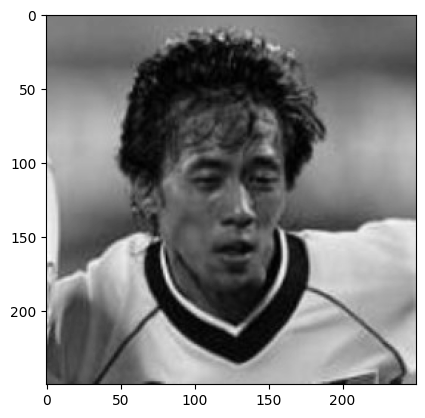

In [ ]:
i = 0
print("True Label: ", labels[i])
print("Image Name: ", img_names[i])
plt.imshow(images[i], cmap='gray')
plt.show()

In [ ]:
#@title Reading .txt files for getting test and train data

# test_path = '/content/peopleDevTest.txt'     #colab crashes when working with huge dataset of 1711x2
test_path = '/content/peopleDevTest1.txt'      #this is a reduced dataset of 25x2
train_path = '/content/peopleDevTrain.txt'

test_data = pd.read_csv(test_path, sep='\t', header=None, skiprows=1).to_numpy()
train_data = pd.read_csv(train_path, sep='\t', header=None, skiprows=1).to_numpy()

print(test_data.shape)
print(train_data.shape)
print()
print("Test data:")
print(test_data)
print()
print("First Three Train Data:")
print(train_data[0])
print(train_data[1])
print(train_data[2])

(25, 2)
(4038, 2)

Test data:
[['AJ_Lamas' 1]
 ['Aaron_Guiel' 1]
 ['Aaron_Tippin' 1]
 ['Abba_Eban' 1]
 ['Abdul_Majeed_Shobokshi' 1]
 ['Abdulaziz_Kamilov' 1]
 ['Abdullah_Gul' 19]
 ['Abdullatif_Sener' 2]
 ['Abel_Aguilar' 1]
 ['Abid_Hamid_Mahmud_Al-Tikriti' 3]
 ['Adam_Ant' 1]
 ['Adam_Kennedy' 1]
 ['Adel_Al-Jubeir' 3]
 ['Adrian_Annus' 1]
 ['Adrian_Murrell' 1]
 ['Adriana_Lima' 1]
 ['Adriana_Perez_Navarro' 1]
 ['Adrien_Brody' 12]
 ['Agbani_Darego' 1]
 ['Agnelo_Queiroz' 1]
 ['Ahmed_Ghazi' 1]
 ['Aileen_Riggin_Soule' 1]
 ['Ain_Seppik' 1]
 ['Aitor_Gonzalez' 2]
 ['Al_Cardenas' 1]]

First Three Train Data:
['AJ_Cook' 1]
['Aaron_Eckhart' 1]
['Aaron_Patterson' 1]


In [ ]:
#@title Creating the training and testing data set

#Dictionary where img_names is key and images is value
labels_img_dict = dict(zip(img_names, images))

train_set = []
test_set = []

# Loop through train_data and add corresponding labels to train_set
for i in range(train_data.shape[0]):
    temp_list = []
    label = train_data[i][0]
    image_no = str(train_data[i][1]).zfill(4)
    image_name = label + "_" + image_no + ".jpg"

    image = labels_img_dict[image_name]
    temp_list.append(image)
    temp_list.append(label)
    train_set.append(temp_list)

# Loop through test_data and add corresponding labels to test_set
for i in range(test_data.shape[0]):
    temp_list = []
    label = test_data[i][0]
    image_no = str(test_data[i][1]).zfill(4)
    image_name = label + "_" + image_no + ".jpg"

    image = labels_img_dict[image_name]
    temp_list.append(image)
    temp_list.append(label)
    test_set.append(temp_list)

test_set = np.array(test_set, dtype=object)
train_set = np.array(train_set, dtype=object)

Train Set Shape (4038, 2)
True Label:  Abdullah_al-Attiyah


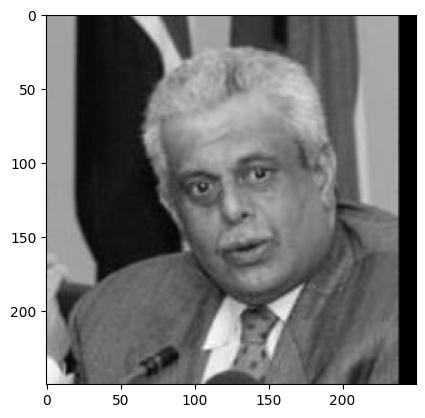

In [ ]:
i = 15

print("Train Set Shape", train_set.shape)

print("True Label: ", train_set[i][1])
plt.imshow(train_set[i][0], cmap='gray')

plt.show()

Test Set Shape (25, 2)
True Label:  Aaron_Guiel


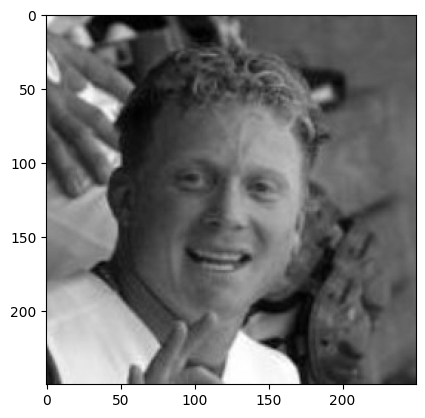

In [ ]:
i = 1
print("Test Set Shape", test_set.shape)
print("True Label: ", test_set[i][1])
plt.imshow(test_set[i][0], cmap='gray')
plt.show()

# Simple Face Recognition

In [ ]:
#@title Reshaping NxN image into N^2x1 vector

image_size = train_set[0][0].shape[0]

train_images = train_set[:, 0]
train_reshaped_images = []

for image in train_images:
  train_reshaped_images.append(image.reshape(image_size * image_size , 1))

train_reshaped_images = np.array(train_reshaped_images, dtype=float)
train_reshaped_images = np.reshape(train_reshaped_images, (train_reshaped_images.shape[0], train_reshaped_images.shape[1]))

In [ ]:
print(f"{image_size}x{image_size} = {image_size*image_size}")
print(train_reshaped_images.shape)
print(f"N^2 = {train_reshaped_images.shape[1]} and M = {train_reshaped_images.shape[0]}")
print(f"So, we have {train_reshaped_images.shape[0]} images of shape {train_reshaped_images.shape[1]} x 1")

250x250 = 62500
(4038, 62500)
N^2 = 62500 and M = 4038
So, we have 4038 images of shape 62500 x 1


In [ ]:
#@title Mean Face Vectors

train_sum = 0
for i in range(train_reshaped_images.shape[0]):
  train_sum = train_sum + train_reshaped_images[i]
average_train_face = train_sum / train_reshaped_images.shape[0]

train_faces_vectors = (train_reshaped_images - average_train_face)

Train Face Vectors Shape:  (4038, 62500)


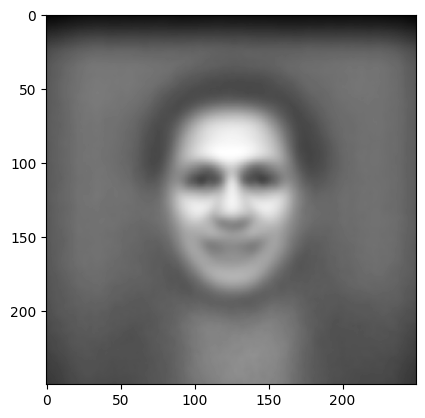

In [ ]:
print("Train Face Vectors Shape: ", train_faces_vectors.shape)
plt.imshow(np.reshape(average_train_face,(250,250)), cmap='gray')

In [ ]:
#@title Making Test Image Same Dimension

test_images = test_set[:, 0]
test_reshaped_images = []

for image in test_images:
  test_reshaped_images.append(image.reshape(image_size * image_size , 1))

test_reshaped_images = np.array(test_reshaped_images, dtype=float)
test_reshaped_images = np.reshape(test_reshaped_images, (test_reshaped_images.shape[0], test_reshaped_images.shape[1]))

In [ ]:
print(test_reshaped_images.shape)

(25, 62500)


(25, 62500)


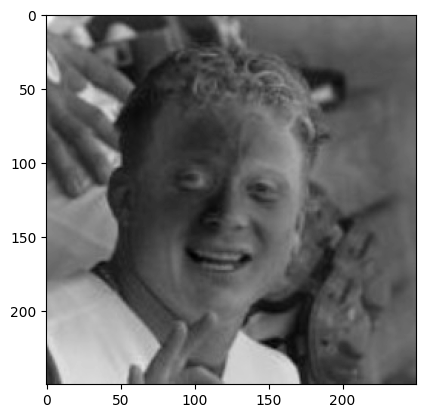

In [ ]:
#@title Subtracting face from average face

centered_test_vector = test_reshaped_images - average_train_face
print(centered_test_vector.shape)
plt.imshow(np.reshape(centered_test_vector[1],(250,250)), cmap='gray')

In [ ]:
#@title Predicting Test Labels

predicted_labels = []

for i in range(centered_test_vector.shape[0]):
  distances = np.linalg.norm(centered_test_vector[i] - train_faces_vectors, axis=1)

  min_index = np.argmin(distances)
  e = distances[min_index]
  if i<17:
    print(f"Values of e{i}: {e}")

  T = 15000

  if e < T:
    label = train_set[min_index, 1]
    predicted_labels.append(label)
    if i<17: #Making sure colab doesn't crash
      print("Test image", i, "recognized as face with label:", label)
  else:
    predicted_labels.append("Not_Recognized")
    if i<17: #Making sure colab doesn't crash
      print("The test image does not match any face in the training set.")

Values of e0: 14227.74251242972
Test image 0 recognized as face with label: Sonia_Gandhi
Values of e1: 13877.765093847063
Test image 1 recognized as face with label: Dragan_Covic
Values of e2: 15287.36671241977
The test image does not match any face in the training set.
Values of e3: 10508.928204150983
Test image 3 recognized as face with label: Brittany_Snow
Values of e4: 12265.4701092131
Test image 4 recognized as face with label: Kurt_Thomas
Values of e5: 13032.919243208715
Test image 5 recognized as face with label: Miguel_Angel_Rodriguez
Values of e6: 16995.59254630447
The test image does not match any face in the training set.
Values of e7: 14770.36407811263
Test image 7 recognized as face with label: Will_Young
Values of e8: 13397.901925301589
Test image 8 recognized as face with label: Guillermo_Canas
Values of e9: 11786.311679231972
Test image 9 recognized as face with label: Jolanta_Kwasniewski
Values of e10: 15797.965406975673
The test image does not match any face in the tr

In [ ]:
#@title Computation Time

import time

start_time = time.time()

predicted_labels = []

for i in range(centered_test_vector.shape[0]):
  distances = np.linalg.norm(centered_test_vector[i] - train_faces_vectors, axis=1)

  min_index = np.argmin(distances)
  e = distances[min_index]

  T = 15000

  if e < T:
    label = train_set[min_index, 1]
    predicted_labels.append(label)
  else:
    predicted_labels.append("Not_Recognized")

elapsed_time = time.time() - start_time
print("Total computation time:", elapsed_time)

Total computation time: 38.9230535030365


In [ ]:
#@title Confusion Matrix

from sklearn.metrics import confusion_matrix

actual_labels = []
for i in range(test_set.shape[0]):
  actual_labels.append(test_set[i,1])

print("Actual Labels: ", actual_labels)
print()
print("Predicted Labels: ", predicted_labels)
print()

labels = []
for label in actual_labels:
    if label not in labels:
        labels.append(label)
conf_matrix = confusion_matrix(actual_labels, predicted_labels, labels=labels)

print("Confusion Matrix:")
print(conf_matrix)

Actual Labels:  ['AJ_Lamas', 'Aaron_Guiel', 'Aaron_Tippin', 'Abba_Eban', 'Abdul_Majeed_Shobokshi', 'Abdulaziz_Kamilov', 'Abdullah_Gul', 'Abdullatif_Sener', 'Abel_Aguilar', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Adam_Ant', 'Adam_Kennedy', 'Adel_Al-Jubeir', 'Adrian_Annus', 'Adrian_Murrell', 'Adriana_Lima', 'Adriana_Perez_Navarro', 'Adrien_Brody', 'Agbani_Darego', 'Agnelo_Queiroz', 'Ahmed_Ghazi', 'Aileen_Riggin_Soule', 'Ain_Seppik', 'Aitor_Gonzalez', 'Al_Cardenas']

Predicted Labels:  ['Sonia_Gandhi', 'Dragan_Covic', 'Not_Recognized', 'Brittany_Snow', 'Kurt_Thomas', 'Miguel_Angel_Rodriguez', 'Not_Recognized', 'Will_Young', 'Guillermo_Canas', 'Jolanta_Kwasniewski', 'Not_Recognized', 'Pilar_Montenegro', 'Yale_Kamisar', 'Linda_Lingle', 'Roberto_Carlos', 'Natalie_Cole', 'Lesley_Flood', 'Shane_Reynolds', 'Martin_Brooke', 'Jane_Leeves', 'Martha_Sahagun_de_Fox', 'Monique_Gagnon-Tremblay', 'Not_Recognized', 'Not_Recognized', 'Milt_Heflin']

Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# Face Recognition using Eigen value and Eigen faces

In [ ]:
#@title Covariance Matrix

cov_matrix = np.dot(train_faces_vectors, train_faces_vectors.T)
print(cov_matrix.shape)

(4038, 4038)


In [ ]:
#@title Calculating Eigen Vectors & Eigen Values

#Calculating eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvectors.shape)

#Mapping eigenvectors of reduced covariance matrix to eigenvectors of C'
eigenvectors = np.dot(train_faces_vectors.T, eigenvectors)
print(eigenvectors.shape)

#Normalizing the eigenvectors by dividing by its norm
for i in range(eigenvectors.shape[1]):
    eigenvectors[:,i] = eigenvectors[:,i]/np.linalg.norm(eigenvectors[:,i])

(4038, 4038)
(62500, 4038)


In [ ]:
#@title Computing K largest Eigenvectors of size N^2 and Eigenfaces

K = 12

#Getting the indices of the K largest eigenvalues
indices = np.argsort(eigenvalues)[::-1][:K]

#Selecting the K eigenvectors corresponding to the K largest eigenvalues
eigenfaces = eigenvectors[:, indices]
print(eigenfaces.shape)

(62500, 12)


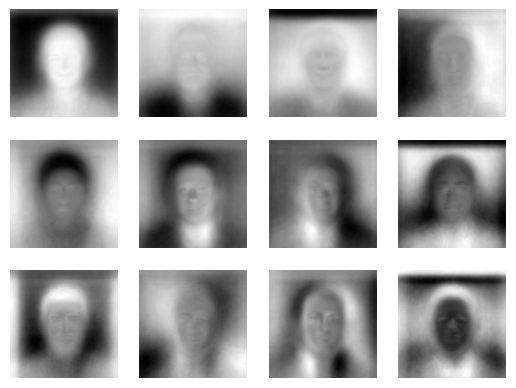

In [ ]:
fig, axes = plt.subplots(3, 4)
for i in range(3):
    for j in range(4):
        index = i * 4 + j
        axes[i, j].imshow(np.reshape(eigenfaces[:, index], (250, 250)), cmap='gray')
        axes[i, j].axis('off')
plt.show()

In [ ]:
#@title Calculating 12 principle components

train_coefficients = np.dot(train_faces_vectors, eigenfaces)
print(train_coefficients.shape)

(4038, 12)


In [ ]:
#@title Calculating test coefficients

test_coefficients = np.dot(centered_test_vector, eigenfaces)
print(test_coefficients.shape)

(16, 12)


In [ ]:
#@title Recognizing Labels

predicted_labels = []

for i in range(centered_test_vector.shape[0]):
  distances = np.linalg.norm(test_coefficients[i] - train_coefficients, axis=1)

  min_index = np.argmin(distances)
  e = distances[min_index]
  print(f"Values of e{i}: {e}")

  T = 5000

  if e < T:
    label = train_set[min_index, 1]
    predicted_labels.append(label)
    if i<20: #Making sure colab doesn't crash
      print("Test image", i, "recognized as face with label:", label)
  else:
    predicted_labels.append("Not_Recognized")
    if i<20: #Making sure colab doesn't crash
      print("The test image does not match any face in the training set.")

Values of e0: 0.0
Test image 0 recognized as face with label: AJ_Cook
Values of e1: 4802.1651096864925
Test image 1 recognized as face with label: Darrell_Royal
Values of e2: 5423.337436007906
The test image does not match any face in the training set.
Values of e3: 3563.547495406429
Test image 3 recognized as face with label: Zeng_Qinghong
Values of e4: 5435.155484961024
The test image does not match any face in the training set.
Values of e5: 9608.929543569913
The test image does not match any face in the training set.
Values of e6: 4426.323471370533
Test image 6 recognized as face with label: Thomas_Enqvist
Values of e7: 4111.376207285542
Test image 7 recognized as face with label: Cynthia_Nixon
Values of e8: 4497.012491376223
Test image 8 recognized as face with label: Hank_Azaria
Values of e9: 7269.883552080321
The test image does not match any face in the training set.
Values of e10: 4964.418374286932
Test image 10 recognized as face with label: Nestor_Santillan
Values of e11: 64

In [ ]:
#@title Computation Time

start_time = time.time()

predicted_labels = []

for i in range(centered_test_vector.shape[0]):
  distances = np.linalg.norm(test_coefficients[i] - train_coefficients, axis=1)

  min_index = np.argmin(distances)
  e = distances[min_index]

  T = 5000

  if e < T:
    label = train_set[min_index, 1]
    predicted_labels.append(label)
  else:
    predicted_labels.append("Not_Recognized")

elapsed_time = time.time() - start_time
print("Total computation time:", elapsed_time)

Total computation time: 0.022219181060791016


In [ ]:
#@title Confusion Matrix

actual_labels = []
for i in range(test_set.shape[0]):
  actual_labels.append(test_set[i,1])

print("Actual Labels: ", actual_labels)
print()
print("Predicted Labels: ", predicted_labels)
print()

labels = []
for label in actual_labels:
    if label not in labels:
        labels.append(label)
conf_matrix = confusion_matrix(actual_labels, predicted_labels, labels=labels)

print("Confusion Matrix:")
print(conf_matrix)

Actual Labels:  ['AJ_Cook', 'Abdullah_al-Attiyah', 'Arnold_Schwarzenegger', 'Junichiro_Koizumi', 'Recep_Tayyip_Erdogan', 'Rudolph_Giuliani', 'Kwon_Yang-sook', 'Luiz_Inacio_Lula_da_Silva', 'Saddam_Hussein', 'Marco_Antonio_Barrera', 'Taha_Yassin_Ramadan', 'Tung_Chee-hwa', 'Venus_Williams', 'Walter_Mondale', 'Wang_Hailan', 'Zurab_Tsereteli']

Predicted Labels:  ['AJ_Cook', 'Darrell_Royal', 'Not_Recognized', 'Zeng_Qinghong', 'Not_Recognized', 'Not_Recognized', 'Thomas_Enqvist', 'Cynthia_Nixon', 'Hank_Azaria', 'Not_Recognized', 'Nestor_Santillan', 'Not_Recognized', 'Robert_DeFraites', 'Not_Recognized', 'Wang_Hailan', 'Alberto_Ruiz_Gallardon']

Confusion Matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 

**The algorithm involving eigenfaces is much more efficient however, both of the algorithm seems to have very poor accuracy.**